# Libraries and Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import and Clean ZRI Data

In [120]:
zri = pd.read_csv('../data/zri/Zip_Zri_AllHomesPlusMultifamily.csv').set_index('RegionName')

In [121]:
col_start = 11
year_start = 2011
year_end = 2019
zri_ann = {}
for y in range(year_start,year_end+1):
    zri_ann[str(y)] = zri.iloc[:,col_start+(y-year_start)*12:col_start+(y-year_start)*12+12]

In [122]:
zri_2017 = zri_ann['2017'].copy()

In [124]:
import seaborn as sns

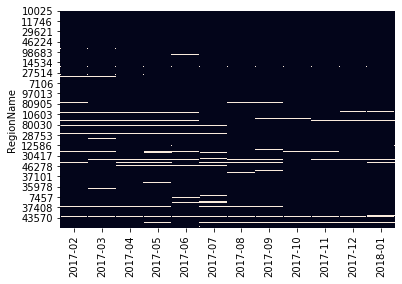

In [125]:
sns.heatmap(zri_2017.isna(),cbar=False)

(array([12136.,   248.,   165.,   113.,    91.,   125.,    34.,    22.,
           29.,   218.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

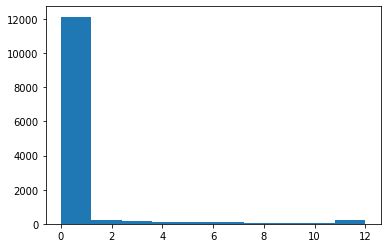

In [126]:
plt.hist(zri_2017.isna().sum(axis=1))

In [127]:
good = zri_2017.isna().sum(axis=1) < 1
zri_2017 = zri_2017[good]
zri_2017_av = pd.DataFrame(zri_2017.mean(axis=1),columns=['2017_av'])

# Import and Clean ACS Data

In [36]:
data = []

import glob
files = glob.glob('../data/ACS_zip/zip_codes_*')

for i in range(len(files)):
    print('File: ',files[i])
    raw = pd.read_csv(files[i])
    raw['year'] = int(re.search('[0-9]+',files[i]).group())
    data.append(raw)

acs = pd.concat(data,sort=False)
acs.shape

File:  ../data/ACS_zip/zip_codes_2017.csv
File:  ../data/ACS_zip/zip_codes_2016.csv
File:  ../data/ACS_zip/zip_codes_2014.csv
File:  ../data/ACS_zip/zip_codes_2015.csv
File:  ../data/ACS_zip/zip_codes_2011.csv
File:  ../data/ACS_zip/zip_codes_2012.csv
File:  ../data/ACS_zip/zip_codes_2013.csv


(231840, 254)

In [141]:
acs_2017 = acs[acs['year'] == 2017].drop(['do_date','year','geoid'],axis=1)

# Combine and Clean

In [184]:
comb = pd.merge(zri_2017_av,acs_2017,left_on=zri_2017_av.index,right_on='geo_id').set_index('geo_id')

In [185]:
missing_col = X_train.isna().mean().sort_values(ascending=False) # Percentage of missing for each column.

for i in range(missing_col[missing_col > 0].shape[0]):
    print(missing_col[missing_col > 0].index[i], missing_col[missing_col > 0][i])
# print out columns that have missing values and their percentage of missingness.

aggregate_travel_time_to_work 0.05277475516866159
median_rent 0.005114254624591948
renter_occupied_housing_units_paying_cash_median_gross_rent 0.0045701849836779105
percent_income_spent_on_rent 0.002720348204570185
owner_occupied_housing_units_lower_value_quartile 0.0015233949945593036
owner_occupied_housing_units_median_value 0.0007616974972796518
median_year_structure_built 0.000544069640914037
median_income 0.0004352557127312296
owner_occupied_housing_units_upper_value_quartile 0.0002176278563656148
income_per_capita 0.0001088139281828074
gini_index 0.0001088139281828074
median_age 0.0001088139281828074


Some columns are 100% missing. Drop these columns. Some have low percentage of missingness. Drop rows (zip codes) that have missing values.

In [186]:
comb = comb.dropna(axis=1,how='all')
comb = comb.dropna(axis=0,how='any')

In [190]:
y = comb.iloc[:,0]
X = comb.iloc[:,1:]

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA

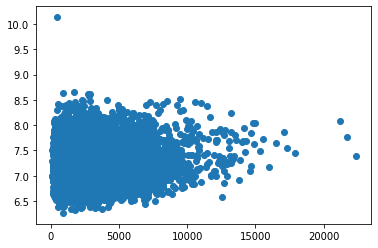

In [235]:
plt.scatter(X_train['nonfamily_households'],np.log(y_train))

One zri is exceptionally high.

(array([2462., 3699., 1389.,  710.,  232.,  100.,   39.,   23.,    9.,
           5.]),
 array([ 523.16666667, 1040.775     , 1558.38333333, 2075.99166667,
        2593.6       , 3111.20833333, 3628.81666667, 4146.425     ,
        4664.03333333, 5181.64166667, 5699.25      ]),
 <a list of 10 Patch objects>)

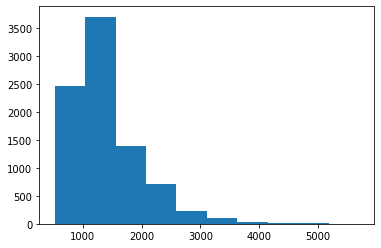

In [203]:
plt.hist(y_train[y_train < 10000])

The histogram excluding the outlier looks okay.

(array([  33.,  791., 1848., 2284., 1851.,  938.,  636.,  196.,   73.,
          18.]),
 array([6.25990009, 6.49871907, 6.73753804, 6.97635702, 7.215176  ,
        7.45399498, 7.69281395, 7.93163293, 8.17045191, 8.40927089,
        8.64808987]),
 <a list of 10 Patch objects>)

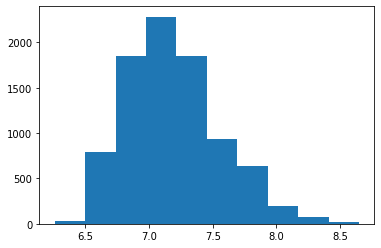

In [233]:
plt.hist(np.log(y_train[y_train < 10000]))

The log distribution is more symmetric!

(array([3.350e+02, 2.802e+03, 3.493e+03, 1.504e+03, 4.580e+02, 7.200e+01,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 6.25990009,  6.64784836,  7.03579663,  7.4237449 ,  7.81169317,
         8.19964144,  8.58758971,  8.97553798,  9.36348625,  9.75143452,
        10.13938279]),
 <a list of 10 Patch objects>)

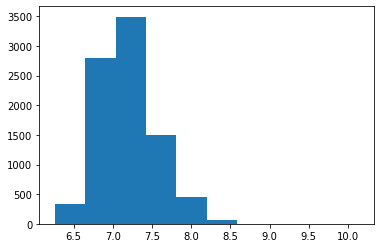

In [234]:
plt.hist(np.log(y_train))

In [197]:
y_train[y_train > 10000]

geo_id
11978    25320.833333
Name: 2017_av, dtype: float64

In [202]:
zri.loc[zri.index == 11978,:]

,RegionID,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
RegionName,,,,,,,,,,,,,,,,,,,,,
11978,62323,Westhampton Beach,NY,New York-Newark-Jersey City,Suffolk County,9895,8976.0,9160.0,9099.0,NaN,...,21732.0,21914.0,22025.0,22018.0,21828.0,21338.0,NaN,20354.0,NaN,20672.0


The outlier is a zip code along the shore in Long Island, New York. Its rent price is indeed high on the zillow website.

In [241]:
X_train[X_train.index == 11978]['median_rent']

geo_id
11978    1621.0
Name: median_rent, dtype: float64

But the median_rent in the cencus data is inconsistent with zri.

Text(0, 0.5, 'Log ACS Median Rent')

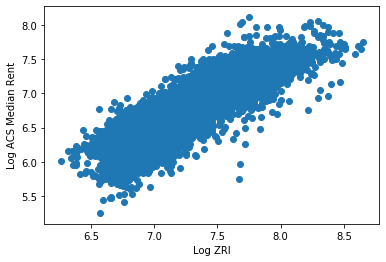

In [240]:
plt.scatter(np.log(y_train[y_train < 10000]),np.log(X_train.loc[y_train < 10000,'median_rent']))
plt.xlabel('Log ZRI')
plt.ylabel('Log ACS Median Rent')

Except one outlier, the median rent in ACS are largely consistent with zri.

# Toy Model - Predict 2019 ZRI the Same as 2018

In [253]:
data = zri.iloc[:,10:-1]

In [254]:
data_2018_2019 = data.iloc[:,12*7:]

In [258]:
data_2018_2019 = data_2018_2019.dropna()

In [264]:
ave_2018 = data_2018_2019.iloc[:,:12].mean(axis=1)
ave_2019 = data_2018_2019.iloc[:,12:].mean(axis=1)

In [265]:
np.sqrt(np.sum((ave_2018-ave_2019)**2)/ave_2019.shape[0])

49.094543736654465